In [1]:
from collections import Counter
import numpy as np
import sklearn.datasets as Datasets
from sklearn.model_selection import train_test_split

In [2]:
#defined the entropy might be useful for further model building remeber simple p=probablilty and simpl formula ofr entropy
#en=sumation of{-1*(p*logp)}
def entropy(y):
    hist=np.bincount(y)
    ps=hist/len(y)
    return (-np.sum(p*np.log2(p) for p in ps if p>0))

In [3]:
class Node:
    def __init__(self,feature=None,threshold=None,left=None,right=None,*,value=None):
        self.feature=feature
        self.threshold=threshold
        self.right=right
        self.left=left
        self.value=value

    def is_leaf_node(self):
        return (self.value is not None)

In [4]:
class DecisionTree:
    def __init__(self,min_samples_split=2,max_depth=100,n_feat=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_feat=n_feat
        self.root=None
    
    def fit(self,X,y):
        self.n_feat=X.shape[1] if not self.n_feat else min(self.n_feat,X.shape[1])
        self.root=self.grow_tree(X,y)

    def grow_tree(self,X,y,depth=0):
        n_samples,n_features=X.shape
        n_labels=len(np.unique(y))

        #stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value=self.most_common_label(y)
            return (Node(value=leaf_value))
        
        feat_idxs=np.random.choice(n_features,self.n_feat,replace=False)

        #greedy search
        best_feat,best_thres=self.best_criteria(X,y,feat_idxs)

        left_idxs,right_idxs=self.split(X[:,best_feat],best_thres)

        left=self.grow_tree(X[left_idxs,:],y[left_idxs],depth+1)
        right=self.grow_tree(X[right_idxs,:],y[right_idxs],depth+1)
        
        return Node(best_feat,best_thres,left,right)

    def best_criteria(self,X,y,feat_idxs):
        best_gain=-1

        split_idx,split_thres=None,None

        for feat_idx in feat_idxs:
            X_column=X[:,feat_idx]
            thresholds=np.unique(X_column)
            for threshold in thresholds:
                gain=self.information_gain(y,X_column,threshold)
                if(gain>best_gain):
                    best_gain=gain
                    split_idx=feat_idx
                    split_thres=threshold
        return (split_idx,split_thres)


    def information_gain(self,y,X_column,split_thres):
        #entropy
        parent_entropy=entropy(y)

        left_idxs,right_idxs=self.split(X_column,split_thres)
        
        if (len(left_idxs)==0 or len(right_idxs)==0):
            return 0
        
        #weighted avg child entropy

        n=len(y)
        n_r,n_l=len(right_idxs),len(left_idxs)
        e_r,e_l=entropy(y[right_idxs]),entropy(y[left_idxs])
        child_entropy=(n_r/n)*e_r +(n_l/n)*e_l

        #ig now

        ig=parent_entropy-child_entropy
        return ig

    def split(self,X_column,split_threh):
        left_idxs=np.argwhere(X_column<=split_threh).flatten()
        right_idxs=np.argwhere(X_column>split_threh).flatten()

        return (left_idxs,right_idxs)   


    def most_common_label(self,y):
        counter=Counter(y)
        most_common=counter.most_common(1)[0][0]
        return most_common
    
    def predict(self,X):
        return (np.array([self.transverse_tree(x, self.root) for x in X]))
        
    def transverse_tree(self,x,node):

        if (node.is_leaf_node()):
            return node.value
        
        if (x[node.feature]<=node.threshold):
            return self.transverse_tree(x,node.left)
        return self.transverse_tree(x,node.right)
    

In [5]:
def accuracy(y_true,y_pred):
    acc=np.sum(y_pred==y_true)/len(y_true)
    return acc

In [6]:
data=Datasets.load_breast_cancer()
X=data.data
y=data.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [8]:
clf=DecisionTree(max_depth=20)
clf.fit(X_train,y_train)

/tmp/ipykernel_29998/3178725852.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (-np.sum(p*np.log2(p) for p in ps if p>0))


In [9]:
y_pred=clf.predict(X_test)
acc_score=accuracy(y_test,y_pred)
print("ACCURACY:",acc_score)

ACCURACY: 0.9385964912280702


SOME PLOTTINGS at last


In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


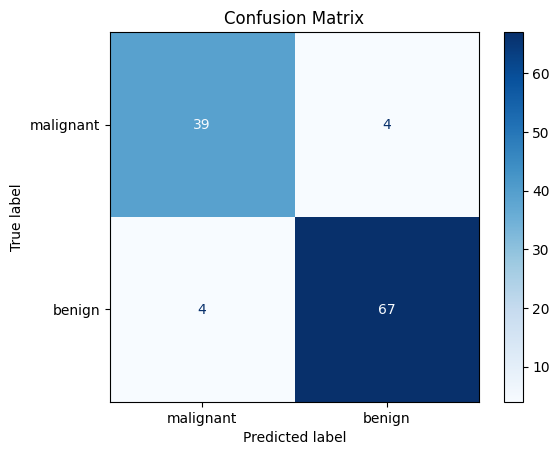

In [35]:

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.savefig('decisiontree1.png')
plt.show()


ecision Boundaries (For 2 Features)

/tmp/ipykernel_29998/3178725852.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (-np.sum(p*np.log2(p) for p in ps if p>0))


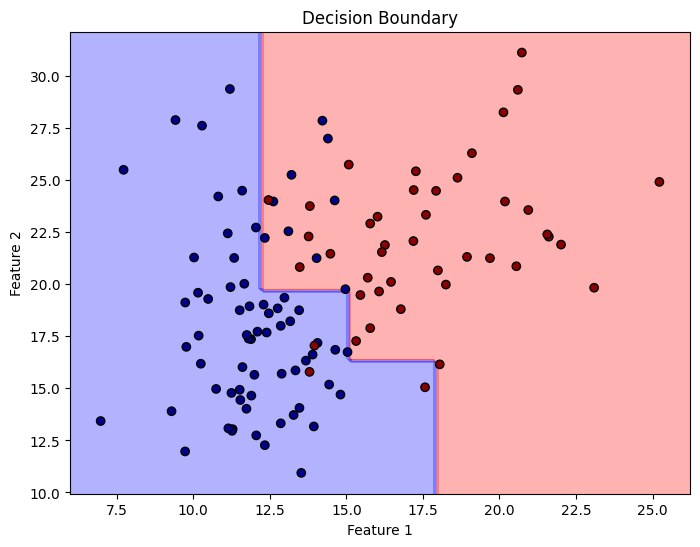

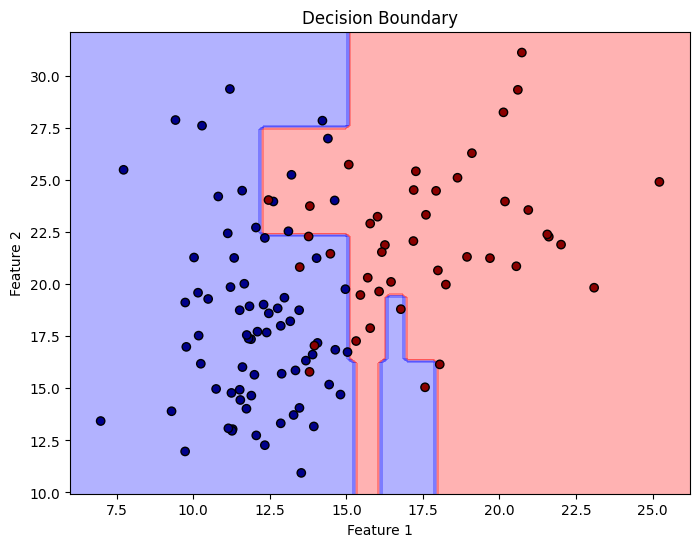

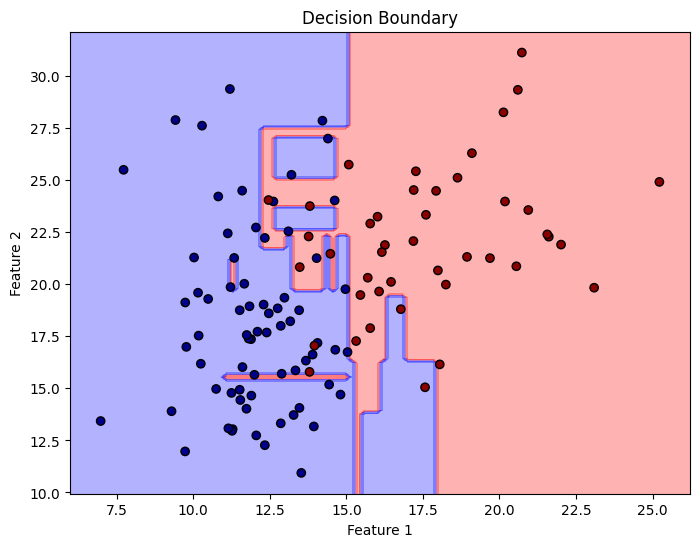

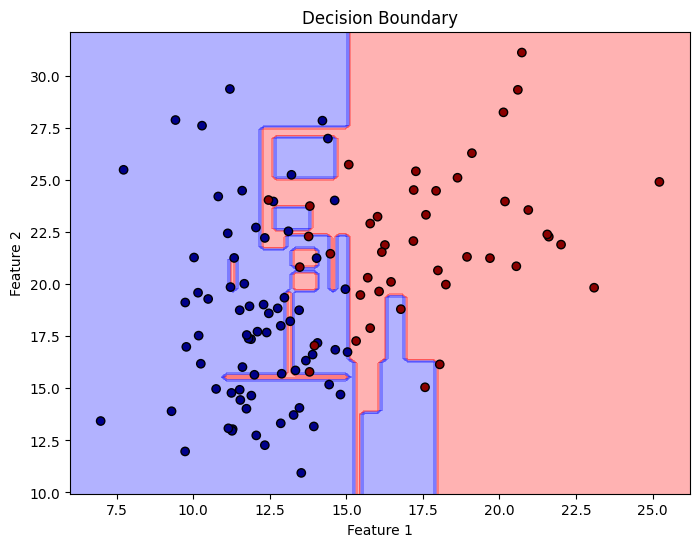

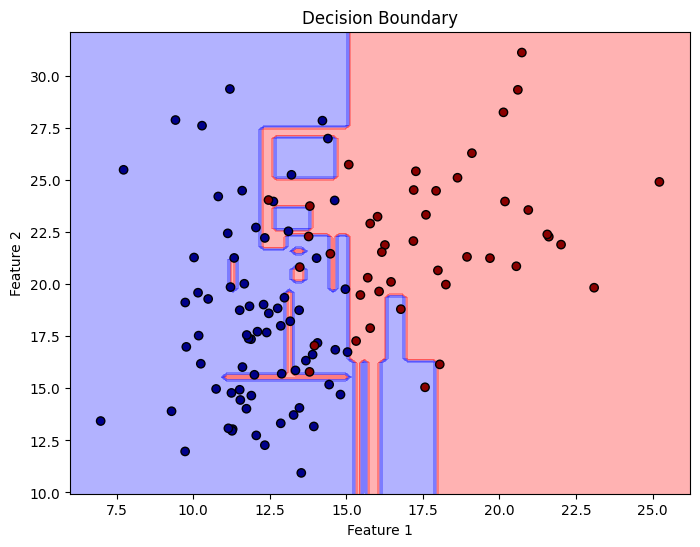

In [19]:

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["red", "blue"]))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=ListedColormap(["darkred", "darkblue"]))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Select two features for visualization
X_train_2D = X_train[:, :2]  # Use first 2 features
X_test_2D = X_test[:, :2]
clf_2D = DecisionTree(max_depth=1)  # Train a simple tree
clf_2D.fit(X_train_2D, y_train)
clf_2D = DecisionTree(max_depth=3)  # Train a simple tree
clf_2D.fit(X_train_2D, y_train)
plot_decision_boundary(clf_2D, X_test_2D, y_test)
clf_2D = DecisionTree(max_depth=5)  # Train a simple tree
clf_2D.fit(X_train_2D, y_train)
plot_decision_boundary(clf_2D, X_test_2D, y_test)
clf_2D = DecisionTree(max_depth=10)  # Train a simple tree
clf_2D.fit(X_train_2D, y_train)
plot_decision_boundary(clf_2D, X_test_2D, y_test)
clf_2D = DecisionTree(max_depth=20)  # Train a simple tree
clf_2D.fit(X_train_2D, y_train)
plot_decision_boundary(clf_2D, X_test_2D, y_test)
clf_2D = DecisionTree(max_depth=30)  # Train a simple tree
clf_2D.fit(X_train_2D, y_train)
plot_decision_boundary(clf_2D, X_test_2D, y_test)


Model Complexity: Tree Depth vs Accuracy

/tmp/ipykernel_29998/3178725852.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (-np.sum(p*np.log2(p) for p in ps if p>0))


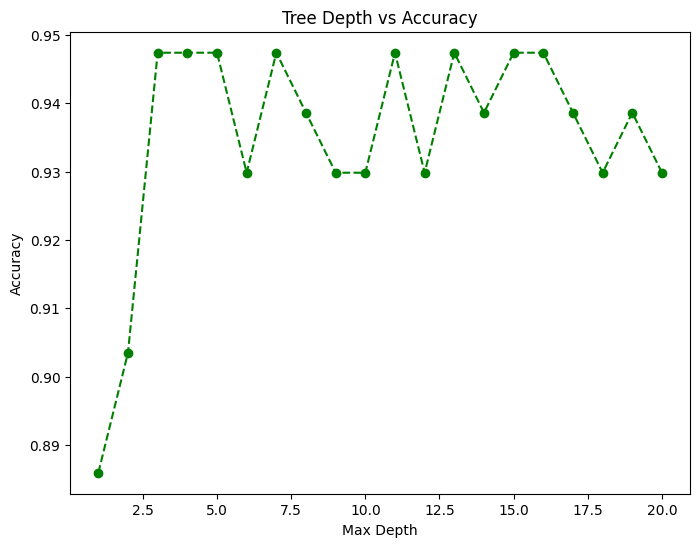

In [26]:
depths = list(range(1, 21))
accuracies = []

for depth in depths:
    clf = DecisionTree(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker="o", linestyle="--", color="b")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Tree Depth vs Accuracy")
plt.show()


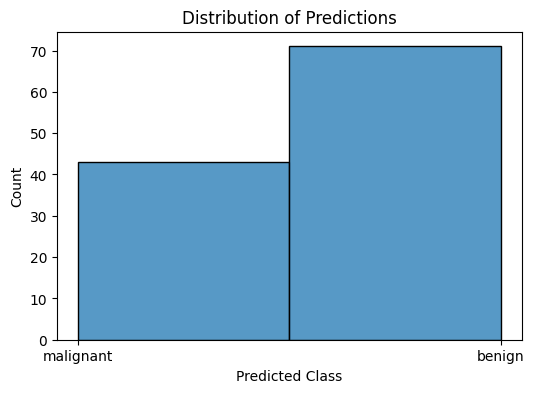

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(y_pred, bins=2, kde=False)
plt.xticks([0, 1], labels=data.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.show()


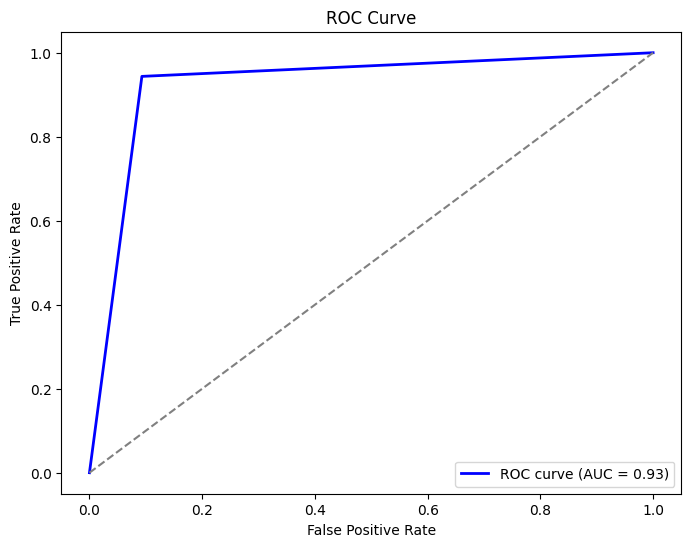

In [28]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = clf.predict(X_test)  # Since we are using a custom tree, we directly use predictions
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


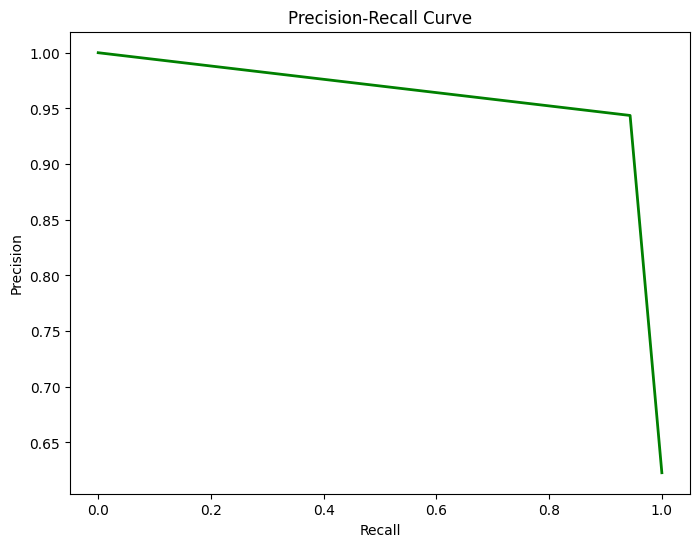

In [29]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="green", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


Training vs. Testing Accuracy (Overfitting Check)

/tmp/ipykernel_29998/3178725852.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (-np.sum(p*np.log2(p) for p in ps if p>0))


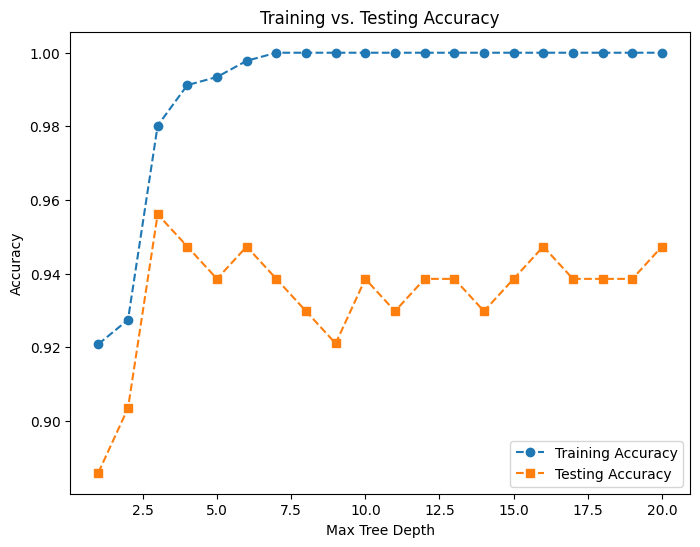

In [31]:
train_accuracies = []
test_accuracies = []
depths = list(range(1, 21))

for depth in depths:
    clf = DecisionTree(max_depth=depth)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy(y_train, clf.predict(X_train))
    test_acc = accuracy(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker="o", linestyle="--")
plt.plot(depths, test_accuracies, label="Testing Accuracy", marker="s", linestyle="--")
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Training vs. Testing Accuracy")
plt.legend()
plt.show()


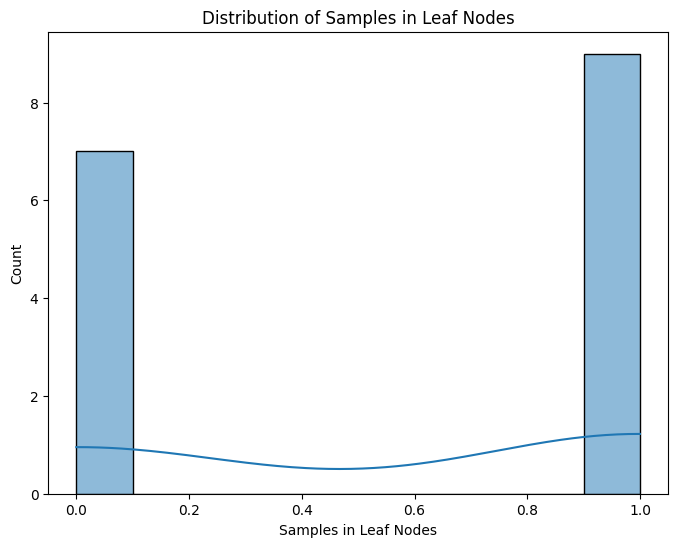

In [32]:
def get_leaf_sizes(node, sizes=[]):
    if node.is_leaf_node():
        sizes.append(node.value)
        return
    get_leaf_sizes(node.left, sizes)
    get_leaf_sizes(node.right, sizes)

leaf_sizes = []
get_leaf_sizes(clf.root, leaf_sizes)

plt.figure(figsize=(8, 6))
sns.histplot(leaf_sizes, bins=10, kde=True)
plt.xlabel("Samples in Leaf Nodes")
plt.ylabel("Count")
plt.title("Distribution of Samples in Leaf Nodes")
plt.show()


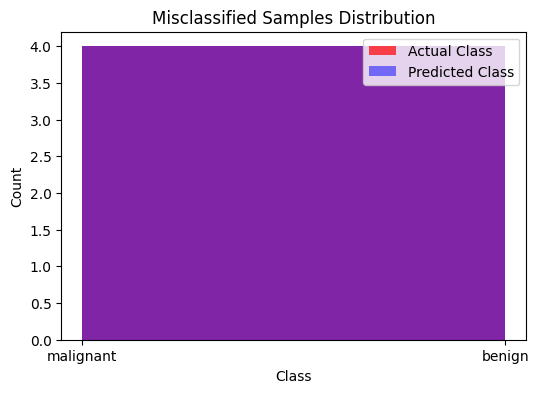

In [33]:
misclassified_idxs = np.where(y_test != y_pred)[0]

plt.figure(figsize=(6, 4))
plt.hist(y_test[misclassified_idxs], bins=2, color="red", alpha=0.7, label="Actual Class")
plt.hist(y_pred[misclassified_idxs], bins=2, color="blue", alpha=0.5, label="Predicted Class")
plt.xticks([0, 1], labels=data.target_names)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Misclassified Samples Distribution")
plt.legend()
plt.show()
